In [9]:
import zipline as zl
import talib as tl

%load_ext zipline
%matplotlib inline

The zipline extension is already loaded. To reload it, use:
  %reload_ext zipline


C:\Installations\Anaconda3\envs\zippy\lib\site-packages\empyrical\stats.py:704: RuntimeWarning: invalid value encountered in true_divide
  out=out,
C:\Installations\Anaconda3\envs\zippy\lib\site-packages\empyrical\stats.py:790: RuntimeWarning: invalid value encountered in true_divide
  np.divide(average_annual_return, annualized_downside_risk, out=out)


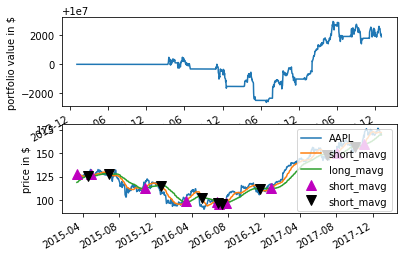

,AAPL,algo_volatility,algorithm_period_return,alpha,benchmark_period_return,benchmark_volatility,beta,capital_used,ending_cash,ending_exposure,...,short_mavg,short_value,shorts_count,sortino,starting_cash,starting_exposure,starting_value,trading_days,transactions,treasury_period_return
2014-01-02 21:00:00+00:00,NaN,NaN,0.000000,NaN,-0.009584,NaN,NaN,0.0,1.000000e+07,0.0,...,NaN,0.0,0,NaN,1.000000e+07,0.0,0.0,1,[],0.0
2014-01-03 21:00:00+00:00,NaN,0.000000,0.000000,0.000000,-0.009773,0.105426,0.000000,0.0,1.000000e+07,0.0,...,NaN,0.0,0,NaN,1.000000e+07,0.0,0.0,2,[],0.0
2014-01-06 21:00:00+00:00,NaN,0.000000,0.000000,0.000000,-0.012616,0.076805,0.000000,0.0,1.000000e+07,0.0,...,NaN,0.0,0,NaN,1.000000e+07,0.0,0.0,3,[],0.0
2014-01-07 21:00:00+00:00,NaN,0.000000,0.000000,0.000000,-0.006552,0.103395,0.000000,0.0,1.000000e+07,0.0,...,NaN,0.0,0,NaN,1.000000e+07,0.0,0.0,4,[],0.0
2014-01-08 21:00:00+00:00,NaN,0.000000,0.000000,0.000000,-0.006335,0.090494,0.000000,0.0,1.000000e+07,0.0,...,NaN,0.0,0,NaN,1.000000e+07,0.0,0.0,5,[],0.0
2014-01-09 21:00:00+00:00,NaN,0.000000,0.000000,0.000000,-0.005685,0.081883,0.000000,0.0,1.000000e+07,0.0,...,NaN,0.0,0,NaN,1.000000e+07,0.0,0.0,6,[],0.0
2014-01-10 21:00:00+00:00,NaN,0.000000,0.000000,0.000000,-0.002978,0.077910,0.000000,0.0,1.000000e+07,0.0,...,NaN,0.0,0,NaN,1.000000e+07,0.0,0.0,7,[],0.0
2014-01-13 21:00:00+00:00,NaN,0.000000,0.000000,0.000000,-0.016270,0.102264,0.000000,0.0,1.000000e+07,0.0,...,NaN,0.0,0,NaN,1.000000e+07,0.0,0.0,8,[],0.0
2014-01-14 21:00:00+00:00,NaN,0.000000,0.000000,0.000000,-0.005523,0.117688,0.000000,0.0,1.000000e+07,0.0,...,NaN,0.0,0,NaN,1.000000e+07,0.0,0.0,9,[],0.0
2014-01-15 21:00:00+00:00,NaN,0.000000,0.000000,0.000000,-0.000163,0.114947,0.000000,0.0,1.000000e+07,0.0,...,NaN,0.0,0,NaN,1.000000e+07,0.0,0.0,10,[],0.0


In [10]:
%%zipline --start 2014-1-1 --end 2018-1-1 -o dma.pickle


from zipline.api import order_target, record, symbol
import matplotlib.pyplot as plt

def initialize(context):
    context.i = 0
    context.asset = symbol('AAPL')


def handle_data(context, data):
    # Skip first 300 days to get full windows
    context.i += 1
    if context.i < 300:
        return

    # Compute averages
    sma = data.history(context.asset, 'price', bar_count=20, frequency="1d").mean()
    lma = data.history(context.asset, 'price', bar_count=50, frequency="1d").mean()

    # Trading logic
    if sma > lma:
        # order_target orders as many shares as needed to
        # achieve the desired number of shares.
        order_target(context.asset, 100)
    elif sma < lma:
        order_target(context.asset, 0)

    # Save values for later inspection
    record(
        AAPL=data.current(context.asset, 'price'),
        short_mavg=sma,
        long_mavg=lma
    )


def analyze(context, perf):
    fig = plt.figure()
    ax1 = fig.add_subplot(211)
    perf.portfolio_value.plot(ax=ax1)
    ax1.set_ylabel('portfolio value in $')

    ax2 = fig.add_subplot(212)
    perf['AAPL'].plot(ax=ax2)
    perf[['short_mavg', 'long_mavg']].plot(ax=ax2)

    perf_trans = perf.ix[[t != [] for t in perf.transactions]]
    buys = perf_trans.ix[[t[0]['amount'] > 0 for t in perf_trans.transactions]]
    sells = perf_trans.ix[
        [t[0]['amount'] < 0 for t in perf_trans.transactions]]
    ax2.plot(buys.index, perf.short_mavg.ix[buys.index],
             '^', markersize=10, color='m')
    ax2.plot(sells.index, perf.short_mavg.ix[sells.index],
             'v', markersize=10, color='k')
    ax2.set_ylabel('price in $')
    plt.legend(loc=0)
    plt.show()